# Content and Objective

+ Show distribution resp. probability of number of "6" when playing dice

# Import

In [1]:
# importing
import numpy as np
from scipy import special

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Simulation

In [3]:
# number of trials 
N_trials = int( 1e3 )

# parameters
N = 10
p = 1/6

# vector of possible number of 6
# NOTE: upper limit not included -> N+1
K = np.arange( 0, N + 1 )


# collecting simulated amount of 6
numb_6 = []

# loop for realizations
for _n in np.arange( N_trials ):

    # throw dice
    sample = np.random.randint( 1, 7, size = N )

    # count amount of "6"
    is_6 = [ int( s == 6 ) for s in sample ]
    count_6 = np.sum ( is_6 )                

    # store result
    numb_6.append( count_6 )


# generate histogram
bins = np.array( [ -.5 + k for k in range( N + 2) ] )
hist = np.histogram( numb_6, bins, density=True )                              

# theoretical distribution as binomial
P_theo = special.binom( N, K ) * p**K * (1-p)**( N - K )

# Plotting

(-0.1, 11)

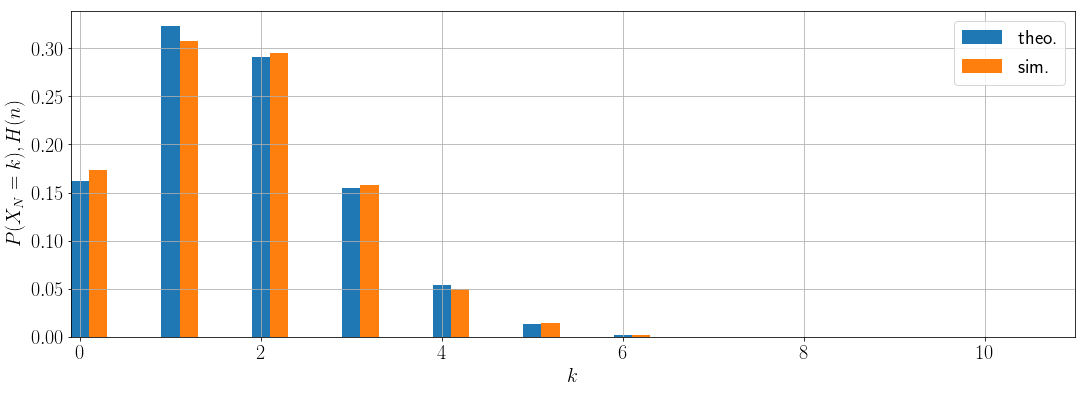

In [4]:
# plotting
plt.figure()

width = 0.2

plt.bar( K, P_theo, linewidth=2.0, width=width, label='theo.')
plt.bar( K + width, hist[0], linewidth=2.0, width=width, label='sim.' )

plt.xlabel('$k$')
plt.ylabel('$P(X_N=k), H(n)$' )
plt.grid( True )
plt.legend( loc = 'upper right' )
plt.xlim( (-width/2, N +1)) 